In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_excel('/kaggle/input/resistance/CVM-2020-NARMS-AnimalPathogenData.xlsx')

In [3]:
df.head()

,Sample ID,Agency,State,Host Species,Collection Source for title,Genus,Drug Name,MIC,Sign,Resistance Count,Year
0,AL36849PPY10001,NAHLN,Alabama,Dogs,Other Tissues/ Body Sites,E. coli,Amikacin,4.00,<=,0.0,2018
1,AL36849PPY10001,NAHLN,Alabama,Dogs,Other Tissues/ Body Sites,E. coli,Amoxicillin/Clavulanic Acid,4.00,=,1.0,2018
2,AL36849PPY10001,NAHLN,Alabama,Dogs,Other Tissues/ Body Sites,E. coli,Ampicillin,2.00,=,1.0,2018
3,AL36849PPY10001,NAHLN,Alabama,Dogs,Other Tissues/ Body Sites,E. coli,Cefazolin,2.00,=,0.0,2018
4,AL36849PPY10001,NAHLN,Alabama,Dogs,Other Tissues/ Body Sites,E. coli,Cefovecin,0.25,<=,0.0,2018


In [4]:
df.shape

(231453, 11)

In [5]:
df.columns

Index(['Sample ID', 'Agency', 'State', 'Host Species',
       'Collection Source for title', 'Genus', 'Drug Name', 'MIC', 'Sign',
       'Resistance Count', 'Year'],
      dtype='object')

In [6]:
columns = ['Sample ID', 'Agency', 'State', 'Host Species','Collection Source for title']
df.drop(columns, inplace=True, axis=1)

In [7]:
df.columns = ['genus', 'drug', 'mic', 'sign', 'resistance', 'year']

In [8]:
df.head()

,genus,drug,mic,sign,resistance,year
0,E. coli,Amikacin,4.00,<=,0.0,2018
1,E. coli,Amoxicillin/Clavulanic Acid,4.00,=,1.0,2018
2,E. coli,Ampicillin,2.00,=,1.0,2018
3,E. coli,Cefazolin,2.00,=,0.0,2018
4,E. coli,Cefovecin,0.25,<=,0.0,2018


In [9]:
df['drug'].unique()

array(['Amikacin', 'Amoxicillin/Clavulanic Acid', 'Ampicillin',
       'Cefazolin', 'Cefovecin', 'Cefpodoxime', 'Ceftazidime',
       'Cephalexin', 'Chloramphenicol', 'Doxycycline', 'Enrofloxacin',
       'Gentamicin', 'Imipenem', 'Marbofloxacin', 'Orbifloxacin',
       'Piperacillin/Tazobactam', 'Pradofloxacin', 'Tetracycline',
       'Trimethoprim/Sulfamethoxazole', 'Cephalothin', 'Clindamycin',
       'Erythromycin', 'Minocycline', 'Nitrofurantoin', 'Oxacillin',
       'Penicillin', 'Rifampin', 'Vancomycin', 'Cefoxitin', 'Ceftiofur',
       'Oxacillin + 2% NaCl', 'Ticarcillin',
       'Ticarcillin/Clavulanic Acid', 'Piperacillin', 'Tobramycin',
       'Polymyxin-B', 'Ciprofloxacin', 'Ampicillin/Sulbactam',
       'Aztreonam', 'Cefepime', 'Ceforanide', 'Cefotetan', 'Ceftriaxone',
       'Cefuroxime', 'Gatifloxacin', 'Meropenem', 'Bacitracin',
       'Moxifloxacin', 'Neomycin', 'Ofloxacin', 'Oxytetracycline',
       'Amoxicillin', 'Florfenicol', 'Novobiocin', 'Spectinomycin',
       '

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231453 entries, 0 to 231452
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   genus       231453 non-null  object 
 1   drug        231453 non-null  object 
 2   mic         231142 non-null  float64
 3   sign        231142 non-null  object 
 4   resistance  229554 non-null  float64
 5   year        231453 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 10.6+ MB


In [11]:
pd.set_option('display.max_rows', 500)

In [12]:
df['drug'].value_counts()

drug
Enrofloxacin                     11101
Marbofloxacin                    10974
Gentamicin                       10972
Chloramphenicol                  10957
Cefpodoxime                      10955
Cefovecin                        10948
Amoxicillin/Clavulanic Acid      10934
Trimethoprim/Sulfamethoxazole    10926
Ampicillin                       10835
Imipenem                         10691
Cefazolin                        10620
Tetracycline                     10252
Doxycycline                      10084
Pradofloxacin                     9888
Amikacin                          7360
Erythromycin                      5870
Clindamycin                       5861
Cephalothin                       5767
Rifampin                          5763
Penicillin                        5656
Nitrofurantoin                    5395
Oxacillin                         5190
Cephalexin                        5182
Minocycline                       5133
Vancomycin                        5075
Ceftazidime         

In [13]:
df.isna().sum()

genus            0
drug             0
mic            311
sign           311
resistance    1899
year             0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
if df['resistance'].dtype == float:
    df['resistance'] = df['resistance'].astype(int)

In [16]:
df.head()

,genus,drug,mic,sign,resistance,year
0,E. coli,Amikacin,4.00,<=,0,2018
1,E. coli,Amoxicillin/Clavulanic Acid,4.00,=,1,2018
2,E. coli,Ampicillin,2.00,=,1,2018
3,E. coli,Cefazolin,2.00,=,0,2018
4,E. coli,Cefovecin,0.25,<=,0,2018


In [17]:
df.isna().sum()

genus         0
drug          0
mic           0
sign          0
resistance    0
year          0
dtype: int64

In [18]:
df.shape

(229554, 6)

In [19]:
df['combined'] = df['mic'].astype(str) + df['sign']

In [20]:
df = pd.get_dummies(df, columns=['drug', ])

In [21]:
df = pd.get_dummies(df, columns=['combined', ])

In [22]:
#from collections import Counter
# def categorical_encoding(column, threshold=0.70, categorical_list=True):
#     """
#     """
#     threshold_num = int(threshold*len(column))
#     categories_list = []
#     k = 0 # initialise empty variable for frequency 
#     counts = Counter(column)
#     for i, j in counts.most_common():
#         k += dict(counts)[i]
#         categories_list.append(i)
#         if k >= threshold_num:
#             break
#     categories_list.append('Other')
#       #Replace all instances not in our new categories by Other  
#     new_column=column.apply(lambda x: x if x in categories_list else 'Other')
#     #Return transformed column and unique values if return_categories=True
#     if(categorical_list):
#         return new_column,categories_list
#     else:
#         return new_column

In [23]:
df.head()

,genus,mic,sign,resistance,year,drug_Amikacin,drug_Amoxicillin/Clavulanic Acid,drug_Ampicillin,drug_Ampicillin/Sulbactam,drug_Aztreonam,...,combined_4.0=,combined_4.0>,combined_4.0>=,combined_64.0=,combined_64.0>,combined_64.0>=,combined_8.0<=,combined_8.0=,combined_8.0>,combined_8.0>=
0,E. coli,4.00,<=,0,2018,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,E. coli,4.00,=,1,2018,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,E. coli,2.00,=,1,2018,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,E. coli,2.00,=,0,2018,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,E. coli,0.25,<=,0,2018,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229554 entries, 0 to 231452
Columns: 108 entries, genus to combined_8.0>=
dtypes: bool(103), float64(1), int64(2), object(2)
memory usage: 33.1+ MB


In [25]:
df.columns

Index(['genus', 'mic', 'sign', 'resistance', 'year', 'drug_Amikacin',
       'drug_Amoxicillin/Clavulanic Acid', 'drug_Ampicillin',
       'drug_Ampicillin/Sulbactam', 'drug_Aztreonam',
       ...
       'combined_4.0=', 'combined_4.0>', 'combined_4.0>=', 'combined_64.0=',
       'combined_64.0>', 'combined_64.0>=', 'combined_8.0<=', 'combined_8.0=',
       'combined_8.0>', 'combined_8.0>='],
      dtype='object', length=108)

In [26]:
for c in df.columns:
    if df[c].dtype == bool:
        df[c] = df[c].astype(int)

In [27]:
df.head()

,genus,mic,sign,resistance,year,drug_Amikacin,drug_Amoxicillin/Clavulanic Acid,drug_Ampicillin,drug_Ampicillin/Sulbactam,drug_Aztreonam,...,combined_4.0=,combined_4.0>,combined_4.0>=,combined_64.0=,combined_64.0>,combined_64.0>=,combined_8.0<=,combined_8.0=,combined_8.0>,combined_8.0>=
0,E. coli,4.00,<=,0,2018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,E. coli,4.00,=,1,2018,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,E. coli,2.00,=,1,2018,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E. coli,2.00,=,0,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,E. coli,0.25,<=,0,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df['genus'].unique()

array(['E. coli', 'S. pseudintermedius', 'Klebsiella spp'], dtype=object)

In [29]:
new_label = {"genus": {'E. coli': 0, 'S. pseudintermedius': 1, 'Klebsiella spp': 2}}
df.replace(new_label , inplace = True)

/tmp/ipykernel_2971/2001298372.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(new_label , inplace = True)


In [30]:
cols = ['mic','sign', 'year']
df.drop(cols, inplace=True, axis=1)

In [31]:
df.head()

,genus,resistance,drug_Amikacin,drug_Amoxicillin/Clavulanic Acid,drug_Ampicillin,drug_Ampicillin/Sulbactam,drug_Aztreonam,drug_Bacitracin,drug_Benzylpenicillin,drug_Cefalotin,...,combined_4.0=,combined_4.0>,combined_4.0>=,combined_64.0=,combined_64.0>,combined_64.0>=,combined_8.0<=,combined_8.0=,combined_8.0>,combined_8.0>=
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
[*df]

['genus',
 'resistance',
 'drug_Amikacin',
 'drug_Amoxicillin/Clavulanic Acid',
 'drug_Ampicillin',
 'drug_Ampicillin/Sulbactam',
 'drug_Aztreonam',
 'drug_Bacitracin',
 'drug_Benzylpenicillin',
 'drug_Cefalotin',
 'drug_Cefazolin',
 'drug_Cefepime',
 'drug_Ceforanide',
 'drug_Cefotetan',
 'drug_Cefovecin',
 'drug_Cefoxitin',
 'drug_Cefpodoxime',
 'drug_Ceftazidime',
 'drug_Ceftiofur',
 'drug_Ceftriaxone',
 'drug_Cefuroxime',
 'drug_Cephalexin',
 'drug_Cephalothin',
 'drug_Chloramphenicol',
 'drug_Ciprofloxacin',
 'drug_Clindamycin',
 'drug_Doxycycline',
 'drug_Enrofloxacin',
 'drug_Erythromycin',
 'drug_Florfenicol',
 'drug_Fusidic Acid',
 'drug_Gatifloxacin',
 'drug_Gentamicin',
 'drug_Imipenem',
 'drug_Levofloxacin',
 'drug_Marbofloxacin',
 'drug_Meropenem',
 'drug_Minocycline',
 'drug_Moxifloxacin',
 'drug_Mupirocin',
 'drug_Neomycin',
 'drug_Nitrofurantoin',
 'drug_Ofloxacin',
 'drug_Orbifloxacin',
 'drug_Oxacillin',
 'drug_Oxacillin + 2% NaCl',
 'drug_Oxytetracycline',
 'drug_Pen

In [33]:
df.shape

(229554, 105)

In [34]:
df['resistance'] = df.pop('resistance')
df.head()

/tmp/ipykernel_2971/1856091696.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['resistance'] = df.pop('resistance')


,genus,drug_Amikacin,drug_Amoxicillin/Clavulanic Acid,drug_Ampicillin,drug_Ampicillin/Sulbactam,drug_Aztreonam,drug_Bacitracin,drug_Benzylpenicillin,drug_Cefalotin,drug_Cefazolin,...,combined_4.0>,combined_4.0>=,combined_64.0=,combined_64.0>,combined_64.0>=,combined_8.0<=,combined_8.0=,combined_8.0>,combined_8.0>=,resistance
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X = df.iloc[:, 0:104].values 
y = df.iloc[:, 104].values    
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv2D, Flatten, Reshape,MaxPooling2D,BatchNormalization

# Reshaping the data to 2D
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building the CNN model
model = Sequential([
    Reshape((X_train.shape[1], 1, 1), input_shape=(X_train.shape[1], 1)),
    Conv2D(64, kernel_size=(1, 1), activation='relu'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(1, 1), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


2024-08-11 22:14:48.703151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 22:14:48.703199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 22:14:48.704572: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 104, 1, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 104, 1, 64)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 104, 1, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 104, 1, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 104, 1, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 104, 1, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,408,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,417,601 (13.04 MB)

 Trainable params: 3,417,217 (13.04 MB)

 Non-trainable params: 384 (1.50 KB)

In [38]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [39]:
early_st = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [40]:
lrr = ReduceLROnPlateau(monitor='val_loss',patience=8,factor=0.5, min_lr=0.00001)

In [41]:
history = model.fit(X_train_cnn, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[lrr,early_st])

Epoch 1/50
  56/2296 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8080 - loss: 1.4026

I0000 00:00:1723414498.651620    3016 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2296/2296 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9504 - loss: 0.1823 - val_accuracy: 0.9662 - val_loss: 0.0706 - learning_rate: 0.0010
Epoch 2/50
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9693 - loss: 0.0691 - val_accuracy: 0.9706 - val_loss: 0.0609 - learning_rate: 0.0010
Epoch 3/50
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9712 - loss: 0.0656 - val_accuracy: 0.9721 - val_loss: 0.0616 - learning_rate: 0.0010
Epoch 4/50
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9725 - loss: 0.0634 - val_accuracy: 0.9725 - val_loss: 0.0627 - learning_rate: 0.0010
Epoch 5/50
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9725 - loss: 0.0626 - val_accuracy: 0.9723 - val_loss: 0.0604 - learning_rate: 0.0010
Epoch 6/50
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9715 - loss: 0.0641 - val_accuracy: 0.9721 - val_loss: 0.0614 - learning_rate: 0.0010
Epoch 7/50
2296/2296 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9724 - loss: 0.062

In [42]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

1435/1435 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9737 - loss: 0.0582
Test Accuracy: 0.9734


1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9737 - loss: 0.0582
Test Loss: 0.059373870491981506
Test Accuracy: 0.9733833074569702


Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

(0.0, 1.0)

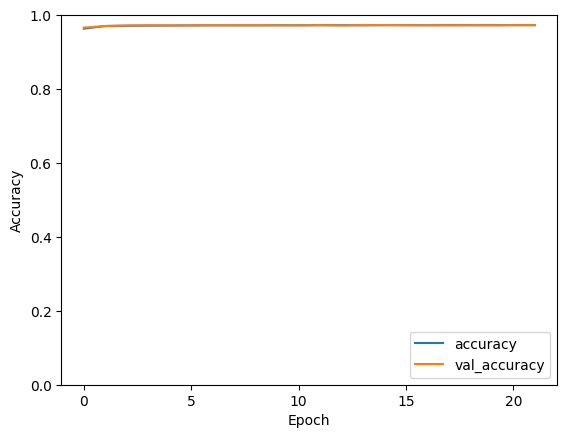

In [43]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [50]:
def plot_loss_and_accuracy(history):
    history_df = pd.DataFrame(history)
    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    
    history_df.loc[0:, ['loss', 'val_loss']].plot(ax=ax[0])
    ax[0].set(xlabel = 'epoch number', ylabel = 'loss')

    history_df.loc[0:, ['accuracy', 'val_accuracy']].plot(ax=ax[1])
    ax[1].set(xlabel = 'epoch number', ylabel = 'accuracy')
    plt.savefig("lossacc.png")

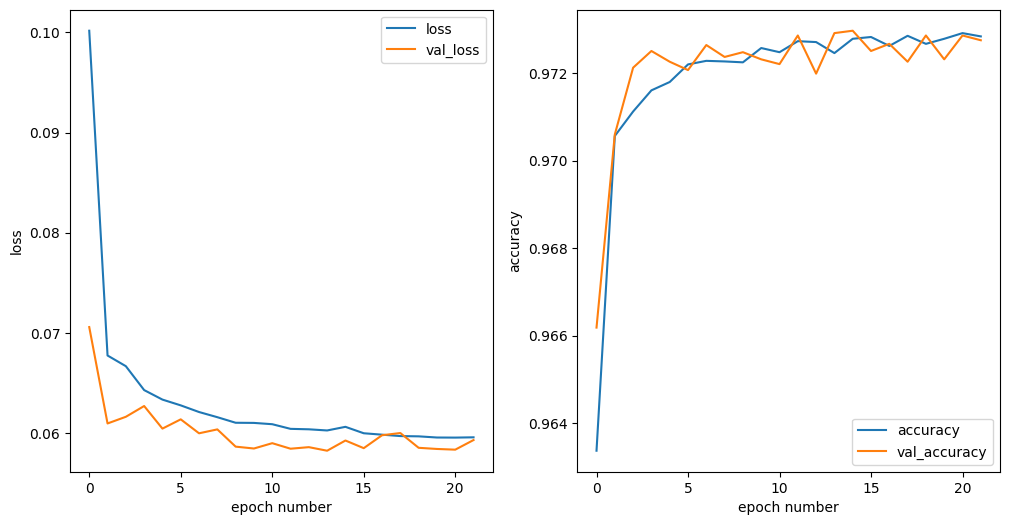

In [51]:
plot_loss_and_accuracy(history.history)

In [47]:
model.save('model.h5')